In [1]:
from __future__ import print_function, division
import sys,os
# line 4 and line 5 below are for development purposes and can be removed
qspin_path = os.path.join(os.getcwd(),"../../")
sys.path.insert(0,qspin_path)
from scipy.linalg import expm
from quspin.operators import hamiltonian, commutator, exp_op # Hamiltonians and operators
from quspin.basis import tensor_basis, spin_basis_1d # bases
from quspin.tools.measurements import obs_vs_time # calculating dynamics
from quspin.tools.Floquet import Floquet_t_vec # period-spaced time vector
import numpy as np # general math functions
import matplotlib.pyplot as plt # plotting library

In [2]:
L = 5
M = 0.1
l=1
no_checks = dict(check_pcon=False,check_symm=False,check_herm=False)


In [3]:
basis=spin_basis_1d(L=L,S = str(l))
print(basis)

reference states: 
array index   /   Fock state   /   integer repr. 
       0.         |2 2 2 2 2>           242  
       1.         |2 2 2 2 1>           241  
       2.         |2 2 2 2 0>           240  
       3.         |2 2 2 1 2>           239  
       4.         |2 2 2 1 1>           238  
       5.         |2 2 2 1 0>           237  
       6.         |2 2 2 0 2>           236  
       7.         |2 2 2 0 1>           235  
       8.         |2 2 2 0 0>           234  
       9.         |2 2 1 2 2>           233  
      10.         |2 2 1 2 1>           232  
      11.         |2 2 1 2 0>           231  
      12.         |2 2 1 1 2>           230  
      13.         |2 2 1 1 1>           229  
      14.         |2 2 1 1 0>           228  
      15.         |2 2 1 0 2>           227  
      16.         |2 2 1 0 1>           226  
      17.         |2 2 1 0 0>           225  
      18.         |2 2 0 2 2>           224  
      19.         |2 2 0 2 1>           223  
      20.  

In [4]:
basis_vectors = []
for index in range(basis.Ns):
    state = np.zeros(basis.Ns)
    state[basis.Ns-index-1] = 1.
    state = state.tolist()
    basis_vectors.append(state)

In [5]:
sigma_01_0 = np.zeros((basis.Ns,basis.Ns))
sigma_12_0 = np.zeros((basis.Ns,basis.Ns))
sigma_02_0 = np.zeros((basis.Ns,basis.Ns))
sigma_01_1 = np.zeros((basis.Ns,basis.Ns))
sigma_12_1 = np.zeros((basis.Ns,basis.Ns))
sigma_02_1 = np.zeros((basis.Ns,basis.Ns))
sigma_01_2 = np.zeros((basis.Ns,basis.Ns))
sigma_12_2 = np.zeros((basis.Ns,basis.Ns))
sigma_02_2 = np.zeros((basis.Ns,basis.Ns))
sigma_01_3 = np.zeros((basis.Ns,basis.Ns))
sigma_12_3 = np.zeros((basis.Ns,basis.Ns))
sigma_02_3 = np.zeros((basis.Ns,basis.Ns))
sigma_01_4 = np.zeros((basis.Ns,basis.Ns))
sigma_12_4 = np.zeros((basis.Ns,basis.Ns))
sigma_02_4 = np.zeros((basis.Ns,basis.Ns))

for i in range(basis.Ns):
    for j in range(basis.Ns):
        
        string_i = basis.int_to_state(basis.Ns-i-1,bracket_notation=False)
        string_j = basis.int_to_state(basis.Ns-j-1,bracket_notation=False)
        #0th link
        if (int(string_i[0]) == 0) & (int(string_j[0]) == 1) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_01_0[i][j] = 1.
        if (int(string_i[0]) == 1) & (int(string_j[0]) == 0) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_01_0[i][j] = 1.
            
        if (int(string_i[0]) == 0) & (int(string_j[0]) == 2) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_02_0[i][j] = 1.
        if (int(string_i[0]) == 2) & (int(string_j[0]) == 0) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_02_0[i][j] = 1.
            
        if (int(string_i[0]) == 1) & (int(string_j[0]) == 2) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_12_0[i][j] = 1.
        if (int(string_i[0]) == 2) & (int(string_j[0]) == 1) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_12_0[i][j] = 1.
        #1st link
        if (int(string_i[1]) == 0) & (int(string_j[1]) == 1) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_01_1[i][j] = 1.
        if (int(string_i[1]) == 1) & (int(string_j[1]) == 0) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_01_1[i][j] = 1.
            
        if (int(string_i[1]) == 0) & (int(string_j[1]) == 2) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_02_1[i][j] = 1.
        if (int(string_i[1]) == 2) & (int(string_j[1]) == 0) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_02_1[i][j] = 1.
            
        if (int(string_i[1]) == 1) & (int(string_j[1]) == 2) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_12_1[i][j] = 1.
        if (int(string_i[1]) == 2) & (int(string_j[1]) == 1) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_12_1[i][j] = 1.
        #2nd link
        if (int(string_i[2]) == 0) & (int(string_j[2]) == 1) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_01_2[i][j] = 1.
        if (int(string_i[2]) == 1) & (int(string_j[2]) == 0) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_01_2[i][j] = 1.
            
        if (int(string_i[2]) == 0) & (int(string_j[2]) == 2) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_02_2[i][j] = 1.
        if (int(string_i[2]) == 2) & (int(string_j[2]) == 0) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_02_2[i][j] = 1.
            
        if (int(string_i[2]) == 1) & (int(string_j[2]) == 2) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_12_2[i][j] = 1.
        if (int(string_i[2]) == 2) & (int(string_j[2]) == 1) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[4]) == int(string_j[4])):
            sigma_12_2[i][j] = 1.   
        #3rd link
        if (int(string_i[3]) == 0) & (int(string_j[3]) == 1) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[4]) == int(string_j[4])):
            sigma_01_3[i][j] = 1.
        if (int(string_i[3]) == 1) & (int(string_j[3]) == 0) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[4]) == int(string_j[4])):
            sigma_01_3[i][j] = 1.
            
        if (int(string_i[3]) == 0) & (int(string_j[3]) == 2) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[4]) == int(string_j[4])):
            sigma_02_3[i][j] = 1.
        if (int(string_i[3]) == 2) & (int(string_j[3]) == 0) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[4]) == int(string_j[4])):
            sigma_02_3[i][j] = 1.
            
        if (int(string_i[3]) == 1) & (int(string_j[3]) == 2) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[4]) == int(string_j[4])):
            sigma_12_3[i][j] = 1.
        if (int(string_i[3]) == 2) & (int(string_j[3]) == 1) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[2]) == int(string_j[2])) & (int(string_i[4]) == int(string_j[4])):
            sigma_12_3[i][j] = 1. 
        #4th link
        if (int(string_i[4]) == 0) & (int(string_j[4]) == 1) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[2]) == int(string_j[2])):
            sigma_01_4[i][j] = 1.
        if (int(string_i[4]) == 1) & (int(string_j[4]) == 0) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[2]) == int(string_j[2])):
            sigma_01_4[i][j] = 1.
            
        if (int(string_i[4]) == 0) & (int(string_j[4]) == 2) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[2]) == int(string_j[2])):
            sigma_02_4[i][j] = 1.
        if (int(string_i[4]) == 2) & (int(string_j[4]) == 0) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[2]) == int(string_j[2])):
            sigma_02_4[i][j] = 1.
            
        if (int(string_i[4]) == 1) & (int(string_j[4]) == 2) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[2]) == int(string_j[2])):
            sigma_12_4[i][j] = 1.
        if (int(string_i[4]) == 2) & (int(string_j[4]) == 1) & (int(string_i[1]) == int(string_j[1])) & (int(string_i[0]) == int(string_j[0])) & (int(string_i[3]) == int(string_j[3])) & (int(string_i[2]) == int(string_j[2])):
            sigma_12_4[i][j] = 1. 
            
sigma_01 = sigma_01_0 + sigma_01_1 + sigma_01_2 + sigma_01_3 + sigma_01_4
sigma_12 = sigma_12_0 + sigma_12_1 + sigma_12_2 + sigma_12_3 + sigma_12_4
sigma_02 = sigma_02_0 + sigma_02_1 + sigma_02_2 + sigma_02_3 + sigma_02_4
def rot(sigma,theta):
    return expm(-1j*theta*sigma/2)

In [6]:
ms_01_0_1 = ((sigma_01_0+sigma_01_1)**2)/2
ms_12_0_1 = ((sigma_12_0+sigma_12_1)**2)/2
ms_02_0_1 = ((sigma_02_0+sigma_02_1)**2)/2

ms_01_1_2 = ((sigma_01_1+sigma_01_2)**2)/2
ms_12_1_2 = ((sigma_12_1+sigma_12_2)**2)/2
ms_02_1_2 = ((sigma_02_1+sigma_02_2)**2)/2

ms_01_2_3 = ((sigma_01_2+sigma_01_3)**2)/2
ms_12_2_3 = ((sigma_12_2+sigma_12_3)**2)/2
ms_02_2_3 = ((sigma_02_2+sigma_02_3)**2)/2

ms_01_3_4 = ((sigma_01_3+sigma_01_4)**2)/2
ms_12_3_4 = ((sigma_12_3+sigma_12_4)**2)/2
ms_02_3_4 = ((sigma_02_3+sigma_02_4)**2)/2


ms_01 = ms_01_0_1 + ms_01_1_2 + ms_01_2_3 + ms_01_3_4
ms_12 = ms_12_0_1 + ms_12_1_2 + ms_12_2_3 + ms_12_3_4
ms_02 = ms_02_0_1 + ms_02_1_2 + ms_02_2_3 + ms_02_3_4


In [7]:
#Gauss_law_0

gauss_law_z_0 = []
gauss_law_z_0.append([1.,0])

gauss_law_0_map = [
    
    ["z",gauss_law_z_0]

    
]

Gauss_law_0  = hamiltonian(gauss_law_0_map,dynamic_list=[],basis=basis,**no_checks)

constraint_0 = Gauss_law_0**2-Gauss_law_0

In [8]:
Proj_10 = 0
Proj_00 = 0
for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_0.expt_value(state)>=1.-1e-8) & (Gauss_law_0.expt_value(state)<=1.+1e-8):
        Proj_10 += np.outer(state,state)
    if (Gauss_law_0.expt_value(state)>=0.-1e-8) & (Gauss_law_0.expt_value(state)<=0.+1e-8):
        Proj_00 += np.outer(state,state)

In [9]:
#Gauss_law_1
gauss_law_zm_1 = []
gauss_law_zm_1.append([-1.,0])

gauss_law_z_1 = []
gauss_law_z_1.append([1.,1])

gauss_law_id_1 = [[1.,1]]

gauss_law_1_map = [
    
    ["z",gauss_law_z_1],
    ["z",gauss_law_zm_1],
    ["I",gauss_law_id_1]
    
]

Gauss_law_1  = hamiltonian(gauss_law_1_map,dynamic_list=[],basis=basis,**no_checks)
constraint_1 = Gauss_law_1**2-Gauss_law_1

In [10]:
Proj_01 = 0
Proj_11 = 0
for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_1.expt_value(state)>=0.-1e-8) & (Gauss_law_1.expt_value(state)<=0.+1e-8):
        Proj_01 += np.outer(state,state)
    if (Gauss_law_1.expt_value(state)>=1.-1e-8) & (Gauss_law_1.expt_value(state)<=1.+1e-8):
        Proj_11 += np.outer(state,state)

In [11]:
#Gauss_law_2
gauss_law_zm_2 = []
gauss_law_zm_2.append([-1.,1])

gauss_law_z_2 = []
gauss_law_z_2.append([1.,2])


gauss_law_2_map = [
    
    ["z",gauss_law_z_2],
    ["z",gauss_law_zm_2],
    
]

Gauss_law_2  = hamiltonian(gauss_law_2_map,dynamic_list=[],basis=basis,**no_checks)
constraint_2 = Gauss_law_2**2-Gauss_law_2

In [12]:
Proj_02 = 0
Proj_12 = 0
for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_2.expt_value(state)>=0.-1e-8) & (Gauss_law_2.expt_value(state)<=0.+1e-8):
        Proj_02 += np.outer(state,state)
    if (Gauss_law_2.expt_value(state)>=1.-1e-8) & (Gauss_law_2.expt_value(state)<=1.+1e-8):
        Proj_12 += np.outer(state,state)

In [13]:
#Gauss_law_3
gauss_law_zm_3 = []
gauss_law_zm_3.append([-1.,2])

gauss_law_z_3 = []
gauss_law_z_3.append([1.,3])

gauss_law_id_3 = [[1.,3]]

gauss_law_3_map = [
    
    ["z",gauss_law_z_3],
    ["z",gauss_law_zm_3],
    ["I",gauss_law_id_3]
    
]

Gauss_law_3  = hamiltonian(gauss_law_3_map,dynamic_list=[],basis=basis,**no_checks)
constraint_3 = Gauss_law_3**2-Gauss_law_3

In [14]:
Proj_03 = 0
Proj_13 = 0

for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_3.expt_value(state)>=0.-1e-8) & (Gauss_law_3.expt_value(state)<=0.+1e-8):
        Proj_03 += np.outer(state,state)
    if (Gauss_law_3.expt_value(state)>=1.-1e-8) & (Gauss_law_3.expt_value(state)<=1.+1e-8):
        Proj_13 += np.outer(state,state)

In [15]:
#Gauss_law_4
gauss_law_zm_4 = []
gauss_law_zm_4.append([-1.,3])

gauss_law_z_4 = []
gauss_law_z_4.append([1.,4])


gauss_law_4_map = [
    
    ["z",gauss_law_z_4],
    ["z",gauss_law_zm_4],
    
]

Gauss_law_4  = hamiltonian(gauss_law_4_map,dynamic_list=[],basis=basis,**no_checks)
constraint_4 = Gauss_law_4**2-Gauss_law_4

In [16]:
Proj_04 = 0
Proj_14 = 0

for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_4.expt_value(state)>=0.-1e-8) & (Gauss_law_4.expt_value(state)<=0.+1e-8):
        Proj_04 += np.outer(state,state)
    if (Gauss_law_4.expt_value(state)>=1.-1e-8) & (Gauss_law_4.expt_value(state)<=1.+1e-8):
        Proj_14 += np.outer(state,state)

In [17]:
#Gauss_law_1
gauss_law_zm_5 = []
gauss_law_zm_5.append([-1.,4])



gauss_law_id_5 = [[1.,4]]

gauss_law_5_map = [
    
    ["z",gauss_law_zm_5],
    ["I",gauss_law_id_5]
    
]

Gauss_law_5  = hamiltonian(gauss_law_5_map,dynamic_list=[],basis=basis,**no_checks)
constraint_5 = Gauss_law_5**2-Gauss_law_5

In [18]:
Proj_05 = 0
Proj_15 = 0

for state in basis_vectors:
    state = np.array(state)
    if (Gauss_law_5.expt_value(state)>=0.-1e-8) & (Gauss_law_5.expt_value(state)<=0.+1e-8):
        Proj_05 += np.outer(state,state)
    if (Gauss_law_5.expt_value(state)>=1.-1e-8) & (Gauss_law_5.expt_value(state)<=1.+1e-8):
        Proj_15 += np.outer(state,state)

In [19]:
kin_energy = [[0.5,i,i] for i in range(L)]
mass_term = [[(-1)**i*2*M,i] for i in range(L)]



quadratic_term_0 = [[1./(2*np.sqrt(2)),0,1]]
linear_term_0 = [[0.5/(2*np.sqrt(2)),0]]

quadratic_term_1 = [[-1./(2*np.sqrt(2)),1,2]]
linear_term_1 = [[1./(2*np.sqrt(2)),1]]

quadratic_term_2 = [[1./(2*np.sqrt(2)),2,3]]
linear_term_2 = [[0.5/(2*np.sqrt(2)),2]]

quadratic_term_3 = [[-1./(2*np.sqrt(2)),3,4]]
linear_term_3 = [[1./(2*np.sqrt(2)),3]]

linear_term_4 = [[0.5/(2*np.sqrt(2)),4]]

kin_mass_map = [
            ["zz", kin_energy], 
            ["z", mass_term], 
]


interaction_map_p0 = [
    
    ["+", linear_term_0],
    ["+z", quadratic_term_0],

]

interaction_map_m0 = [
    
    ["-", linear_term_0],
    ["-z", quadratic_term_0],
]

interaction_map_p1 = [
    
    ["+z", quadratic_term_1],
    ["+", linear_term_1]
]

interaction_map_m1 = [
    
    ["-z", quadratic_term_1],
    ["-", linear_term_1]
]

interaction_map_p2 = [
    
    ["+z", quadratic_term_2],
    ["+", linear_term_2]
]

interaction_map_m2 = [
    
    ["-z", quadratic_term_2],
    ["-", linear_term_2]
]


interaction_map_p3 = [
    
    ["+z", quadratic_term_3],
    ["+", linear_term_3]
]

interaction_map_m3 = [
    
    ["-z", quadratic_term_3],
    ["-", linear_term_3]
]

interaction_map_p4 = [
    
    ["+", linear_term_4]
]

interaction_map_m4 = [
    
    ["-", linear_term_4]
]







H_int_p0 = hamiltonian(interaction_map_p0,dynamic_list=[],basis=basis,**no_checks)
H_int_m0 = hamiltonian(interaction_map_m0,dynamic_list=[],basis=basis,**no_checks)

H_int_p1 = hamiltonian(interaction_map_p1,dynamic_list=[],basis=basis,**no_checks)
H_int_m1 = hamiltonian(interaction_map_m1,dynamic_list=[],basis=basis,**no_checks)

H_int_p2 = hamiltonian(interaction_map_p2,dynamic_list=[],basis=basis,**no_checks)
H_int_m2 = hamiltonian(interaction_map_m2,dynamic_list=[],basis=basis,**no_checks)

H_int_p3 = hamiltonian(interaction_map_p3,dynamic_list=[],basis=basis,**no_checks)
H_int_m3 = hamiltonian(interaction_map_m3,dynamic_list=[],basis=basis,**no_checks)

H_int_p4 = hamiltonian(interaction_map_p4,dynamic_list=[],basis=basis,**no_checks)
H_int_m4 = hamiltonian(interaction_map_m4,dynamic_list=[],basis=basis,**no_checks)

H_kin_mass = hamiltonian(kin_mass_map,dynamic_list=[],basis=basis,**no_checks)

h_int_p0 = H_int_p0.toarray()
h_int_m0 = H_int_m0.toarray()

h_int_p1 = H_int_p1.toarray()
h_int_m1 = H_int_m1.toarray()

h_int_p2 = H_int_p2.toarray()
h_int_m2 = H_int_m2.toarray()

h_int_p3 = H_int_p3.toarray()
h_int_m3 = H_int_m3.toarray()

h_int_p4 = H_int_p4.toarray()
h_int_m4 = H_int_m4.toarray()

h_kin_mass = H_kin_mass.toarray()

h_int_0 = Proj_10 @ h_int_p0 @ Proj_11 + Proj_11 @ h_int_m0 @ Proj_10
h_int_1 = Proj_11 @ h_int_p1 @ Proj_12 + Proj_12 @ h_int_m1 @ Proj_11
h_int_2 = Proj_12 @ h_int_p2 @ Proj_13 + Proj_13 @ h_int_m2 @ Proj_12
h_int_3 = Proj_13 @ h_int_p3 @ Proj_14 + Proj_14 @ h_int_m3 @ Proj_13
h_int_4 = Proj_14 @ h_int_p4 @ Proj_15 + Proj_15 @ h_int_m4 @ Proj_14

h_int = h_int_0+h_int_1+h_int_2+h_int_3+h_int_4

full_ham_matrix = h_kin_mass + h_int
constraint_full = 1e3*(constraint_0**2+constraint_1**2+constraint_2**2+constraint_3**2+constraint_3**2+constraint_4**2+constraint_5**2)
constraint_full_matrix = constraint_full.toarray()

restricted_full_ham_matrix = full_ham_matrix+constraint_full_matrix


In [20]:
for i in range(basis.Ns):
    for j in range(basis.Ns):
        if (h_int[i][j]<=-1e-5) | (h_int[i][j]>=1e-5):
            print((h_int[i][j],i,j))

((0.25+0j), 3, 4)
((0.25+0j), 4, 3)
((0.25+0j), 12, 13)
((0.25+0j), 13, 12)
((0.5+0j), 13, 16)
((0.5+0j), 16, 13)
((0.25+0j), 21, 22)
((0.25+0j), 22, 21)
((0.25+0j), 27, 108)
((0.25+0j), 28, 109)
((0.25+0j), 29, 110)
((0.25+0j), 30, 31)
((0.25+0j), 30, 39)
((0.25+0j), 30, 111)
((0.25+0j), 31, 30)
((0.25+0j), 31, 40)
((0.25+0j), 31, 112)
((0.25+0j), 32, 41)
((0.25+0j), 32, 113)
((0.25+0j), 33, 114)
((0.25+0j), 34, 115)
((0.25+0j), 35, 116)
((0.25+0j), 36, 117)
((0.25+0j), 37, 118)
((0.25+0j), 38, 119)
((0.25+0j), 39, 30)
((0.25+0j), 39, 40)
((0.25+0j), 39, 120)
((0.25+0j), 40, 31)
((0.25+0j), 40, 39)
((0.5+0j), 40, 43)
((0.25+0j), 40, 121)
((0.25+0j), 41, 32)
((0.25+0j), 41, 122)
((0.25+0j), 42, 123)
((0.5+0j), 43, 40)
((0.25+0j), 43, 124)
((0.25+0j), 44, 125)
((0.25+0j), 45, 126)
((0.25+0j), 46, 127)
((0.25+0j), 47, 128)
((0.25+0j), 48, 49)
((0.25+0j), 48, 129)
((0.25+0j), 49, 48)
((0.25+0j), 49, 130)
((0.25+0j), 50, 131)
((0.25+0j), 51, 132)
((0.25+0j), 52, 133)
((0.25+0j), 53, 134)
(

In [21]:
def check_hermitian(a, rtol=1e-10, atol=1e-10):
    return np.allclose(a, a.conj().T, rtol=rtol, atol=atol)

In [22]:
print(check_hermitian(restricted_full_ham_matrix))

True


In [23]:
eigenval,eigenvec = np.linalg.eigh(restricted_full_ham_matrix)

In [24]:
print(eigenval[eigenval<=1e2])

[-0.65482394  0.32268235  0.35230616  0.52372549  0.68500232  0.74386267
  1.31426968  1.41499768  1.47780874  1.55614901  1.61988374  1.61988374
  1.74769384  1.78150003  2.08692274  2.34790323  2.48011626  2.48011626
  2.7       ]


In [25]:
print(eigenvec[:,0])

[ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j -2.80505473e-18+0.j
 -1.23140476e-02+0.j  4.38396898e-02+0.j -3.08333360e-17+0.j
  1.26634814e-16+0.j  6.93889390e-17+0.j  0.00000000e+00+0.j
  5.20417043e-18+0.j -2.22044605e-16+0.j  0.00000000e+00+0.j
  4.80127526e-02+0.j -1.91158483e-01+0.j -1.12757026e-17+0.j
  0.00000000e+00+0.j  9.08534071e-02+0.j  7.80625564e-18+0.j
 -1.38777878e-17+0.j  8.67361738e-19+0.j  0.00000000e+00+0.j
 -3.25260652e-19+0.j  5.

In [26]:
expt_value = 0
psi_0 = eigenvec[:,0]
matvec_h = full_ham_matrix@psi_0
matvec_c = constraint_full_matrix@psi_0
for i in range(basis.Ns):
    expt_value += np.conj(psi_0[i])*(matvec_h[i]+matvec_c[i])
print(np.real(expt_value))

-0.6548239364061843


In [27]:
mixing_term = [[1.,i,i+1] for i in range(L-1)]
#mixing_term.append([1,0,2])
mixing_map_xx = [
    ["z+",mixing_term],
    ["z-",mixing_term],
    ["+z",mixing_term],
    ["-z",mixing_term],
]
mixing_map_zz = [
    ["zz",mixing_term]
]
mixing_map_pm = [
    ["+-",mixing_term],
    ["-+",mixing_term]
]
Ham_mix_xx = hamiltonian(mixing_map_xx,dynamic_list=[],basis=basis,**no_checks)
Ham_mix_zz = hamiltonian(mixing_map_zz,dynamic_list=[],basis=basis,**no_checks)
Ham_mix_pm = hamiltonian(mixing_map_pm,dynamic_list=[],basis=basis,**no_checks)

In [28]:
resource_z = [[1.,i] for i in range(L)]
resource_zz = [[1.,i,i] for i in range(L)]
resource_x = [[0.5,i] for i in range(L)]

resource_map_zz = [
    
    ["zz", resource_zz],
]

resource_map_z = [
    ["z", resource_z],
]

resource_map_x = [
    ["+", resource_x],
    ["-", resource_x],

]





Ham_res_zz = hamiltonian(resource_map_zz,dynamic_list=[],basis=basis,**no_checks)
Ham_res_z = hamiltonian(resource_map_z,dynamic_list=[],basis=basis,**no_checks)
Ham_res_x = hamiltonian(resource_map_x,dynamic_list=[],basis=basis,**no_checks)



In [29]:
print(check_hermitian(Ham_res_x.toarray()))

True


In [30]:
Ham_res = Ham_res_zz+Ham_res_z+Ham_res_x

In [31]:
eigenval_mix, eigenvec_mix = Ham_res.eigh()

In [32]:
psi_0 = np.zeros(basis.Ns)
i_0 = basis.index("00000")
psi_0[i_0] = 1.
#psi_0 = eigenvec_mix[:,0]

In [33]:
expt_value = 0
matvec_h = full_ham_matrix@psi_0
matvec_c = constraint_full_matrix@psi_0
for i in range(basis.Ns):
    expt_value += np.conj(psi_0[i])*(matvec_h[i]+matvec_c[i])
print(np.real(expt_value))

8002.3


In [34]:
expt_value = 0
matvec = full_ham_matrix@psi_0
for i in range(basis.Ns):
    expt_value += np.conj(psi_0[i])*matvec[i]
print(expt_value)

(2.3+0j)


In [35]:
def cost_function_sigma(theta,psi,a):

    psi_1 = rot(sigma_02,theta[2])@rot(sigma_12,theta[1])@rot(sigma_01,theta[0])@psi
    
    psi_2 = rot(ms_02,theta[5])@rot(ms_12,theta[4])@rot(ms_01,theta[3])@psi_1
    
    psi_3 = rot(sigma_02,theta[8])@rot(sigma_12,theta[7])@rot(sigma_01,theta[6])@psi_2
    
    psi_4 = rot(ms_02,theta[11])@rot(ms_12,theta[10])@rot(ms_01,theta[9])@psi_3
    
    psi_5 = rot(sigma_02,theta[14])@rot(sigma_12,theta[13])@rot(sigma_01,theta[12])@psi_4
    
    psi_6 = rot(ms_02,theta[17])@rot(ms_12,theta[16])@rot(ms_01,theta[15])@psi_5
    
    psi_7 = rot(sigma_02,theta[20])@rot(sigma_12,theta[19])@rot(sigma_01,theta[18])@psi_6
    
    psi_8 = rot(ms_02,theta[23])@rot(ms_12,theta[22])@rot(ms_01,theta[21])@psi_7
    
    psi_9 = rot(sigma_02,theta[26])@rot(sigma_12,theta[25])@rot(sigma_01,theta[24])@psi_8
    


    expt_value = 0
    matvec = full_ham_matrix@psi_9
    for i in range(basis.Ns):
        expt_value += np.conj(psi_9[i])*matvec[i]
    return np.real(expt_value)

In [36]:
from scipy.optimize import dual_annealing
import datetime
duan_ranges = [(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.)]
resduan = 0
resopt = 0
print(datetime.datetime.now())
resduan = dual_annealing(cost_function_sigma, duan_ranges, args = (psi_0,1))
print(datetime.datetime.now())

2022-02-16 10:47:17.283706


KeyboardInterrupt: 

In [ ]:
print(resduan.fun)
print(resduan.x)

In [ ]:
theta = resduan.x
psi = psi_0

psi_1 = rot(sigma_02,theta[2])@rot(sigma_12,theta[1])@rot(sigma_01,theta[0])@psi

psi_2 = rot(ms_02,theta[5])@rot(ms_12,theta[4])@rot(ms_01,theta[3])@psi_1

psi_3 = rot(sigma_02,theta[8])@rot(sigma_12,theta[7])@rot(sigma_01,theta[6])@psi_2

psi_4 = rot(ms_02,theta[11])@rot(ms_12,theta[10])@rot(ms_01,theta[9])@psi_3

psi_5 = rot(sigma_02,theta[14])@rot(sigma_12,theta[13])@rot(sigma_01,theta[12])@psi_4

psi_6 = rot(ms_02,theta[17])@rot(ms_12,theta[16])@rot(ms_01,theta[15])@psi_5

psi_7 = rot(sigma_02,theta[20])@rot(sigma_12,theta[19])@rot(sigma_01,theta[18])@psi_6

psi_8 = rot(ms_02,theta[23])@rot(ms_12,theta[22])@rot(ms_01,theta[21])@psi_7

psi_9 = rot(sigma_02,theta[26])@rot(sigma_12,theta[25])@rot(sigma_01,theta[24])@psi_8

print(np.abs(np.dot(np.conj(psi_9),eigenvec[:,0]))**2)
print(psi_9)
print(np.abs(np.dot(np.conj(psi_9),psi_9)))

In [ ]:
def cost_function(theta,psi,a):

    psi_1 = Ham_res_zz.evolve(psi,0.0,theta[0])
    psi_2 = Ham_res_x.evolve(psi_1,0.0,theta[1])
    psi_3 = Ham_res_z.evolve(psi_2,0.0,theta[2])
    psi_4 = Ham_mix_pm.evolve(psi_3,0.0,theta[3])
    psi_5 = Ham_res_zz.evolve(psi_4,0.0,theta[4])
    psi_6 = Ham_res_x.evolve(psi_5,0.0,theta[5])
    psi_7 = Ham_res_z.evolve(psi_6,0.0,theta[6])
    psi_8 = Ham_mix_pm.evolve(psi_7,0.0,theta[7])
    psi_9 = Ham_res_zz.evolve(psi_8,0.0,theta[8])
    psi_10 = Ham_res_x.evolve(psi_9,0.0,theta[9])
    psi_11 = Ham_res_z.evolve(psi_10,0.0,theta[10])
    psi_12 = Ham_mix_pm.evolve(psi_11,0.0,theta[11])
    psi_13 = Ham_res_zz.evolve(psi_12,0.0,theta[12])
    psi_14 = Ham_res_x.evolve(psi_13,0.0,theta[13])
    psi_15 = Ham_res_z.evolve(psi_14,0.0,theta[14])
    psi_16 = Ham_mix_pm.evolve(psi_15,0.0,theta[15])
    psi_17 = Ham_res_zz.evolve(psi_16,0.0,theta[16])
    psi_18 = Ham_res_x.evolve(psi_17,0.0,theta[17])
    psi_19 = Ham_res_z.evolve(psi_18,0.0,theta[18])
    #psi_24 = Ham_mix_pm.evolve(psi_23,0.0,theta[23])
    #psi_25 = Ham_mix_zz.evolve(psi_24,0.0,theta[24])
    #psi_26 = Ham_res_zz.evolve(psi_25,0.0,theta[25])
    #psi_27 = Ham_res_x.evolve(psi_26,0.0,theta[26])
    #psi_28 = Ham_res_z.evolve(psi_27,0.0,theta[27])
    expt_value = 0
    matvec = full_ham_matrix@psi_19
    for i in range(basis.Ns):
        expt_value += np.conj(psi_19[i])*matvec[i]
    return np.real(expt_value)

In [34]:
from scipy.optimize import dual_annealing
import datetime
duan_ranges = [(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.),(-10.,10.)]
resduan = 0
resopt = 0
print(datetime.datetime.now())
resduan = dual_annealing(cost_function, duan_ranges, args = (psi_0,1))
print(datetime.datetime.now())

2022-02-15 16:07:59.809898


KeyboardInterrupt: 

In [ ]:
print(resduan.fun)
print(resduan.x)

In [ ]:
theta = resduan.x
psi = psi_0
psi_1 = Ham_res_zz.evolve(psi,0.0,theta[0])
psi_2 = Ham_res_x.evolve(psi_1,0.0,theta[1])
psi_3 = Ham_res_z.evolve(psi_2,0.0,theta[2])
psi_4 = Ham_mix_pm.evolve(psi_3,0.0,theta[3])
psi_5 = Ham_res_zz.evolve(psi_4,0.0,theta[4])
psi_6 = Ham_res_x.evolve(psi_5,0.0,theta[5])
psi_7 = Ham_res_z.evolve(psi_6,0.0,theta[6])
psi_8 = Ham_mix_pm.evolve(psi_7,0.0,theta[7])
psi_9 = Ham_res_zz.evolve(psi_8,0.0,theta[8])
psi_10 = Ham_res_x.evolve(psi_9,0.0,theta[9])
psi_11 = Ham_res_z.evolve(psi_10,0.0,theta[10])
psi_12 = Ham_mix_pm.evolve(psi_11,0.0,theta[11])
psi_13 = Ham_res_zz.evolve(psi_12,0.0,theta[12])
psi_14 = Ham_res_x.evolve(psi_13,0.0,theta[13])
psi_15 = Ham_res_z.evolve(psi_14,0.0,theta[14])
psi_16 = Ham_mix_pm.evolve(psi_15,0.0,theta[15])
psi_17 = Ham_res_zz.evolve(psi_16,0.0,theta[16])
psi_18 = Ham_res_x.evolve(psi_17,0.0,theta[17])
psi_19 = Ham_res_z.evolve(psi_18,0.0,theta[18])
scall = 0
for i in range(basis.Ns):
    scall +=np.conj(psi_19[i])*eigenvec[:,0][i]
print(np.abs(scall)**2)


In [299]:
print(resduan.fun)
print(resduan.x)

-0.55011331227517
[-4.03878836  5.55989785  1.8595793  -4.86248275  4.78149869 -4.97471836
 -3.46452114 -5.98009609  7.19264618 -2.90166265 -9.05421587  7.69811738]


In [26]:
print(resduan.fun)
print(resduan.x)

-0.5519403500645929
[-5.51745973 -7.35332971 -8.73503791 -6.69417094 -9.43419771 -4.57265972
 -8.02672357 -6.66334215  3.92019751  5.37077267  8.82461006  1.96698853
 -0.23597123 -4.77601285 -7.15362785]


In [71]:
print(resduan.fun)
print(resduan.x)

0.13079051773119577
[ 1.78158287  1.24069723 -8.26738098  5.20148629 -8.82759711  3.13383203
  6.98924758 -5.95115289  1.16599966 -5.08488822  9.01939631 -7.28177711
 -6.29981209 -5.73060885 -6.09134693]


In [66]:
print(resduan.fun)
print(resduan.x)

-0.5687610819382901
[-2.10102319  3.66971985  4.69080298  4.00974595  1.35454097 -0.90753474
  0.53533885  9.77209822 -1.55066619 -6.43452929  0.90925203  6.18037783
 -0.41672004 -8.56560744  9.63070562]


In [28]:
psi = psi_0
psi_1 = Ham_mix.evolve(psi,0.0,-9.78930793)
psi_2 = Ham_res_1.evolve(psi_1,0.0,7.78040255)
psi_3 = Ham_res_2.evolve(psi_2,0.0,1.5833793)


expt_value = 0
matvec = full_ham_matrix@psi_3
for i in range(basis.Ns):
    expt_value += np.conj(psi_3[i])*matvec[i]
print(np.real(expt_value))
energy_after_one_layer = expt_value

0.40057114041132186


In [29]:
psi = psi_0
psi_1 = Ham_mix.evolve(psi,0.0,1.87443663)
psi_2 = Ham_res_1.evolve(psi_1,0.0,4.23721195)
psi_3 = Ham_res_2.evolve(psi_2,0.0,-8.5794782)
psi_4 = Ham_mix.evolve(psi_3,0.0,4.95468396)
psi_5 = Ham_res_1.evolve(psi_4,0.0,-6.30491365)
psi_6 = Ham_res_2.evolve(psi_5,0.0,1.98934673)

expt_value = 0
matvec = full_ham_matrix@psi_6
for i in range(basis.Ns):
    expt_value += np.conj(psi_6[i])*matvec[i]
print(np.real(expt_value))
energy_after_two_layers = expt_value

-0.046172959230028295


In [30]:

psi = psi_0
psi_1 = Ham_mix.evolve(psi,0.0,-1.30400919)
psi_2 = Ham_res_1.evolve(psi_1,0.0,-0.94233231)
psi_3 = Ham_res_2.evolve(psi_2,0.0,-2.07176727)
psi_4 = Ham_mix.evolve(psi_3,0.0,-5.11506299)
psi_5 = Ham_res_1.evolve(psi_4,0.0,8.57112885)
psi_6 = Ham_res_2.evolve(psi_5,0.0,-8.17867129)
psi_7 = Ham_mix.evolve(psi_6,0.0,2.55365574)
psi_8 = Ham_res_1.evolve(psi_7,0.0,5.39687006)
psi_9 = Ham_res_2.evolve(psi_8,0.0,-5.00071697)


expt_value = 0
matvec = full_ham_matrix@psi_9
for i in range(basis.Ns):
    expt_value += np.conj(psi_9[i])*matvec[i]
print(np.real(expt_value))
energy_after_three_layers = expt_value

-0.4279426327807378


In [81]:
mixing_term = [[0.5,i] for i in range(L)]

mixing_map = [
    
    ["+",mixing_term],
    ["-",mixing_term],
]

Ham_mix = hamiltonian(mixing_map,dynamic_list=[],basis=basis,**no_checks)

In [82]:
eigenval_mix,eigenvec_mix = Ham_mix.eigh()
psi_0 = eigenvec_mix[:,0]

In [83]:
resource = [[1.,i,i+1] for i in range(L-2)]

#resource_x0 = [[0.5,0]]

#resource_x = [[-1.,1]]

resource_z = [[1.,2]]


resource_map_1 = [
    
    ["+-", resource],
    ["-+", resource],
]
resource_map_2 = [
    ["+z", resource],
    ["-z", resource],
    ["z", resource_z],
    
]



Ham_res_1 = hamiltonian(resource_map_1,dynamic_list=[],basis=basis,**no_checks)
Ham_res_2 = hamiltonian(resource_map_2,dynamic_list=[],basis=basis,**no_checks)


In [84]:

psi = psi_0
psi_1 = Ham_mix.evolve(psi,0.0,-4.03878836)
psi_2 = Ham_res_1.evolve(psi_1,0.0,5.55989785)
psi_3 = Ham_res_2.evolve(psi_2,0.0,1.8595793)
psi_4 = Ham_mix.evolve(psi_3,0.0,-4.86248275)
psi_5 = Ham_res_1.evolve(psi_4,0.0,4.78149869)
psi_6 = Ham_res_2.evolve(psi_5,0.0,-4.97471836)
psi_7 = Ham_mix.evolve(psi_6,0.0,-3.46452114)
psi_8 = Ham_res_1.evolve(psi_7,0.0,-5.98009609)
psi_9 = Ham_res_2.evolve(psi_8,0.0,7.19264618)
psi_10 = Ham_mix.evolve(psi_9,0.0,-2.90166265)
psi_11 = Ham_res_1.evolve(psi_10,0.0,-9.05421587)
psi_12 = Ham_res_2.evolve(psi_11,0.0,7.69811738)

expt_value = 0
matvec = full_ham_matrix@psi_12
for i in range(basis.Ns):
    expt_value += np.conj(psi_12[i])*matvec[i]
print(np.real(expt_value))
energy_after_four_layers = expt_value

-0.5501222499961802


In [85]:
print(psi_12)

[-5.63243289e-05+8.09304299e-05j -2.64911736e-03-2.60548828e-03j
  5.67914461e-02-4.09422282e-02j -5.25060164e-06-2.30968808e-05j
  8.91248601e-04-4.85866346e-05j -1.92323173e-03+1.67074806e-02j
  1.71217523e-04-3.42233465e-04j  1.16270842e-02+8.53022824e-03j
 -1.95297817e-01+1.88908502e-01j  2.27977117e-05+1.37020059e-05j
 -6.53468720e-04+7.59972646e-04j -1.20434258e-02-1.45465951e-02j
  3.79531003e-04-9.18874091e-04j  3.17264280e-02+1.99248759e-02j
 -4.70658622e-01+5.26093260e-01j  4.18128571e-04-7.99274832e-04j
  2.70390718e-02+2.06001942e-02j -4.68340285e-01+4.36892508e-01j
  4.52503520e-05-3.54257683e-05j  1.02901358e-03+1.90548789e-03j
 -3.86536488e-02+1.30708913e-02j -1.77740470e-05+1.20485778e-04j
 -4.36291484e-03-1.42421189e-03j  4.02848386e-02-7.65182393e-02j
 -6.83149052e-06-1.68274053e-05j  6.68390090e-04-1.47083525e-04j
  6.12730827e-04+1.28805232e-02j]


In [33]:
scall = 0
for i in range(basis.Ns):
    scall +=np.conj(psi_12[i])*eigenvec[:,0][i]
print(np.abs(scall))

0.9900424740311967


/home/ppopov/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


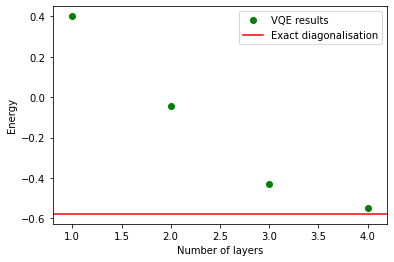

In [46]:
plt.plot(np.array([1.,2.,3.,4.]),np.array([energy_after_one_layer,energy_after_two_layers,energy_after_three_layers,energy_after_four_layers]), 'o', color = "green",label="VQE results")
plt.plot(np.array([0.,2.,3.,4.5]), np.array([eigenval[0],eigenval[0],eigenval[0],eigenval[0]]),color = "red",label="Exact diagonalisation")
plt.xlim(0.8,4.2)
plt.xlabel("Number of layers")
plt.ylabel("Energy")
plt.legend()